In [117]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import confusion_matrix, accuracy_score, jaccard_score

In [121]:
def get_file_names(path):
    files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    return sorted([x for x in files if 'labels' in x])

def plot_confusion_matrix(cm, target_names):
    cmap = plt.get_cmap('Greys')
    
    plt.figure(figsize=(17, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=0)
        plt.yticks(tick_marks, target_names)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:0.4f}%".format(cm[i, j]*100),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

In [107]:
ground_truth_path = './ConvPoint/examples/semantic3d/ground_truth/'

In [108]:
labels_files = get_file_names(ground_truth_path)
labels = []
for cloud_file in labels_files:
    with open(train_path+cloud_file) as fp:
        labels += [int(line.split()[0]) for line in fp]
len(labels)

4480

In [109]:
predictions_path = './ConvPoint/examples/semantic3d/path_to_save_dir_benchmark/'

In [110]:
predictions_files = get_file_names(predictions_path)
predictions = []
for cloud_file in predictions_files:
    with open(predictions_path+cloud_file) as fp:
        predictions += [int(line.split()[0]) for line in fp]
len(predictions)

4480

In [111]:
cm = confusion_matrix(labels, predictions, labels=list(range(1, 4)), normalize='true')

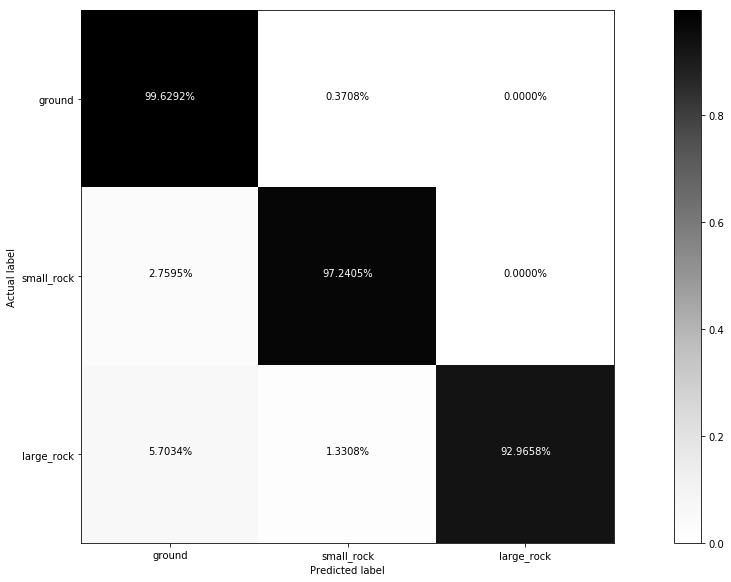

In [123]:
plot_confusion_matrix(cm, ['ground', 'small_rock', 'large_rock'])

In [139]:
l = ['M1v'+str(x) for x in list(range(1, 21))]
l += ['M2v'+str(x) for x in list(range(1, 21))]

In [142]:
l

['M1v1',
 'M1v2',
 'M1v3',
 'M1v4',
 'M1v5',
 'M1v6',
 'M1v7',
 'M1v8',
 'M1v9',
 'M1v10',
 'M1v11',
 'M1v12',
 'M1v13',
 'M1v14',
 'M1v15',
 'M1v16',
 'M1v17',
 'M1v18',
 'M1v19',
 'M1v20',
 'M2v1',
 'M2v2',
 'M2v3',
 'M2v4',
 'M2v5',
 'M2v6',
 'M2v7',
 'M2v8',
 'M2v9',
 'M2v10',
 'M2v11',
 'M2v12',
 'M2v13',
 'M2v14',
 'M2v15',
 'M2v16',
 'M2v17',
 'M2v18',
 'M2v19',
 'M2v20']

In [ ]:
test_names = [x if  in l]